In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

1.13.1


In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
pip install --upgrade matplotlib


The following command must be run outside of the IPython shell:

    $ pip install --upgrade matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])

<Figure size 640x480 with 1 Axes>

5


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

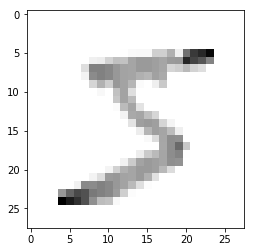

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2638 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1053 - acc: 0.9672
Epoch 3/3
10000/10000 [==============================] - 1s 53us/sample - loss: 0.0912 - acc: 0.9727
0.09124456794764847
0.9727


[[9.63575053e-12 5.66238434e-08 3.37725027e-07 ... 9.99998689e-01
  6.26290186e-10 7.87128052e-09]
 [5.06068032e-09 6.05257461e-04 9.99393344e-01 ... 6.59828789e-11
  1.78779604e-08 2.57531246e-10]
 [6.05649859e-07 9.98753786e-01 1.07767091e-05 ... 2.03654432e-04
  7.43407581e-04 4.25753205e-06]
 ...
 [6.45765774e-10 5.86321505e-07 2.82896284e-08 ... 6.21148956e-06
  2.13323756e-06 1.29112770e-04]
 [5.66763617e-07 7.47308661e-07 1.10956506e-07 ... 6.54016560e-07
  1.53193527e-04 2.47365488e-08]
 [4.18945696e-08 6.71970497e-08 1.34690552e-07 ... 2.13171251e-11
  1.22324124e-07 8.09522192e-08]]
1


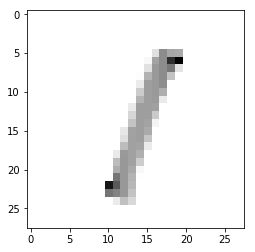

In [8]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)
import numpy as np

print(np.argmax(predictions[5]))
plt.imshow(x_test[5],cmap=plt.cm.binary)
plt.show()